# <center>Итоговый проект первого года обучения Skillfactory Data Science

# <center>Определение уязвимых групп населения

## <center> 3.  Разведывательный анализ данных (EDA)
    

Импортируем библиотеки

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import scipy.stats as stats

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Зачитаем данные объединенного датасета

In [2]:
df = pd.read_csv(
    'social_russia_data/data_regions_2020.csv', index_col='region')
display(df.head())

child_mortality_percent  \
region                                                            
Алтайский край                                         0.485583   
Амурская область                                       0.534827   
Архангельская область без Ненецкого АО                 0.325623   
Астраханская область                                   0.586564   
Белгородская область                                   0.380505   

                                        general_morbidity  \
region                                                      
Алтайский край                                   112764.7   
Амурская область                                  83412.0   
Архангельская область без Ненецкого АО            99842.1   
Астраханская область                              64679.9   
Белгородская область                              74637.4   

                                        congenital_malformation  psychosis  \
region                                                                       
Алтайский край                                            200.1     1272.1   
Амурская область                                          370.1      446.7   
Архангельская область без Ненецкого АО                    458.9      685.3   
Астраханская область                                      415.1      624.5   
Белгородская область                                      136.2      388.2   

                                        teenage_pregnancy  poverty_percent  \
region                                                                       
Алтайский край                                        3.3             17.5   
Амурская область                                      4.4             15.2   
Архангельская область без Ненецкого АО               13.8             12.3   
Астраханская область                                  0.0             15.6   
Белгородская область                                  0.0              7.2   

                                        welfare_expense_share  \
region                                                          
Алтайский край                                           29.7   
Амурская область                                         21.7   
Архангельская область без Ненецкого АО                   21.4   
Астраханская область                                     31.4   
Белгородская область                                     16.1   

                                        nominal_incomes  real_incomes  \
region                                                                  
Алтайский край                                  23864.0          95.5   
Амурская область                                35499.0         100.3   
Архангельская область без Ненецкого АО          34852.0          98.4   
Астраханская область                            25199.0          97.1   
Белгородская область                            32841.0          98.1   

                                        formal_wage  ...  retail  \
region                                               ...           
Алтайский край                              30072.0  ...  153605   
Амурская область                            52430.0  ...  245233   
Архангельская область без Ненецкого АО      52779.0  ...  250033   
Астраханская область                        38885.0  ...  174527   
Белгородская область                        37442.0  ...  237076   

                                        newborn_per_population  \
region                                                           
Алтайский край                                        0.862092   
Амурская область                                      0.993995   
Архангельская область без Ненецкого АО                0.815251   
Астраханская область                                  1.084828   
Белгородская область                                  0.797340   

                                        disabled_percent  all crimes  \
region                                                              

### 3.1 Описание датасета

Датасет содержит экономические и демографические показатели за 2020 г., по которому наиболее полная статистика. Некоторые из показателй представлены за 2016 и 2018 гг., т.к. отсутствуют более свежие данные.

| Название признака | Описание | Единица измерения | Период |
|-|-|-|-|
| child_mortality_percent | Число умерших на первом году жизни детей за год по отношению к числу родившихся| % | 2020 |
| general_morbidity, congenital_malformation, psychosis, teenage_pregnancy | Общая заболеваемость, врожденные пороки развития, психические расстройства, подростковая беременность | кол-во. / 100 тыс. населения | 2016 |
| poverty_percent | Процент населения за чертой бедности | %  | 2020 |
| welfare_expense_share | Расходы на социальную политику от общих расходов бюджета региона | % | 2020 |
| nominal_incomes | Средний денежный доход (в месяц) | руб. / чел. | 2020 |
| real_incomes | Реальные денежные доходы (покупательная способность: с учетом роста цен) | процент к предыдущему году | 2020 |
| formal_wage |Среднемесячная номинальная начисленная заработная плата | руб. / чел. | 2020 |
| real_pay | Реальная начисленная заработная плата (покупательная способность: с учетом роста цен) | процент к предыдущему году | 2020 |
| living area | Жилищные условия: средняя жилая площадь на одного человека | кв.м. | 2020 |
| bad conditions | Жилищные условия: процент домохозяйств, указавших на плохое состояние жилого помещения | % | 2020 |
| no funds | Жилищные условия: процент домохозяйств, не имеющих средств для улучшения жилищных условий | % | 2020 |
| population | Население | чел. | 2020 |
| grp | Валовый региональный продукт на душу населения | руб. / чел. | 2020 |
| reg_prod_total | Региональное производство по отношению к численности населения | тыс. руб/чел | 2020 |
| retail | Розничная торговля | руб. / чел. | 2020 |
| newborn_per_population | Рождаемость по отношению к численности населения | % | 2020 |
| disabled_percent | Инвалидность по отношению к численности населения | % | 2020 |
| all crimes | Данные о преступлениях (общее количество) | Кол-во | 2020 |
| very hard crimes | Данные о преступлениях (особо тяжкие) | Кол-во | 2020 |
| hard crimes | Данные о преступлениях (тяжкие) | Кол-во | 2020 |
| middle hard crimes | Данные о преступлениях средней тяжести | Кол-во | 2020 |
| little hard crimes | Данные о преступлениях небольшой тяжести | Кол-во | 2020 |
| alco| Сведения о заболеваемости алкоголизмом | кол-во. / 100 тыс. населения | 2018 |
| drug | Сведения о заболеваемости наркоманией | кол-во. / 100 тыс. населения | 2018 |

### 3.2 Анализ данных

Проанализируем датасет на наличие пропусков

In [3]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, Алтайский край to Ярославская область
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   child_mortality_percent  85 non-null     float64
 1   general_morbidity        85 non-null     float64
 2   congenital_malformation  85 non-null     float64
 3   psychosis                85 non-null     float64
 4   teenage_pregnancy        85 non-null     float64
 5   poverty_percent          85 non-null     float64
 6   welfare_expense_share    85 non-null     float64
 7   nominal_incomes          85 non-null     float64
 8   real_incomes             85 non-null     float64
 9   formal_wage              85 non-null     float64
 10  real_pay                 85 non-null     float64
 11  living area              85 non-null     float64
 12  bad conditions           85 non-null     float64
 13  no funds                 85 non-null     float64
 14  pop

None

Пропусков нет. Посмотрим статистику данных 

In [4]:
display(df.describe())

child_mortality_percent  general_morbidity  congenital_malformation  \
count                85.000000          85.000000                85.000000   
mean                  0.472787       79982.394118               225.000000   
std                   0.159563       17440.366421               142.432464   
min                   0.212258       44792.000000                40.800000   
25%                   0.376911       67012.900000               124.600000   
50%                   0.446650       77439.000000               192.000000   
75%                   0.546946       89949.900000               288.100000   
max                   1.489758      138231.700000               853.100000   

         psychosis  teenage_pregnancy  poverty_percent  welfare_expense_share  \
count    85.000000          85.000000        85.000000              85.000000   
mean    472.397647          17.796471        13.874118              22.927059   
std     191.557415          69.297895         5.046006               5.237829   
min     106.000000           0.000000         4.800000               6.400000   
25%     354.800000           0.000000        10.400000              21.600000   
50%     446.100000           4.200000        13.300000              23.500000   
75%     572.700000          11.800000        15.600000              25.700000   
max    1272.100000         624.400000        31.700000              35.100000   

       nominal_incomes  real_incomes    formal_wage  ...         retail  \
count        85.000000     85.000000      85.000000  ...      85.000000   
mean      33020.517647     98.942353   45361.082353  ...  199342.423529   
std       14912.478645      2.796272   19827.022626  ...   56438.817000   
min       16877.000000     92.500000   29083.000000  ...   50713.000000   
25%       24864.000000     97.300000   33139.000000  ...  164879.000000   
50%       28596.000000     98.600000   37820.000000  ...  197028.000000   
75%       33149.000000    100.400000   48286.000000  ...  232860.000000   
max       89928.000000    110.900000  120641.000000  ...  408674.000000   

       newborn_per_population  disabled_percent    all crimes  \
count               85.000000         85.000000     85.000000   
mean                 0.991884          3.021281   7583.341176   
std                  0.243848          1.278538   5807.940649   
min                  0.701046          1.390960    269.000000   
25%                  0.841174          2.319571   3454.000000   
50%                  0.952598          2.757932   5406.000000   
75%                  1.043704          3.205056  10203.000000   
max                  2.036280          9.395588  23788.000000   

       very hard crimes  hard crimes  middle hard crimes  little hard crimes  \
count         85.000000    85.000000           85.000000           85.000000   
mean         318.458824  1174.329412         1960.176471         4130.341176   
std          269.017062   928.589822         1592.843117         3152.637122   
min            6.000000    35.000000           74.000000          147.000000   
25%          133.000000   551.000000          805.000000         1892.000000   
50%          224.000000   833.000000         1407.000000         3214.000000   
75%          429.000000  1670.000000         2707.000000         5457.000000   
max         1176.000000  4204.000000         6277.000000        13297.000000   

             alco       drug  
count   85.000000  85.000000  
mean    65.487059  10.032941  
std     34.689561   8.931930  
min      0.200000   0.000000  
25%     45.300000   5.100000  
50%     61.100000   7.700000  
75%     79.100000  12.100000  
max    208.700000  65.400000  

[8 rows x 27 columns]

Визуализируем распределение признаков

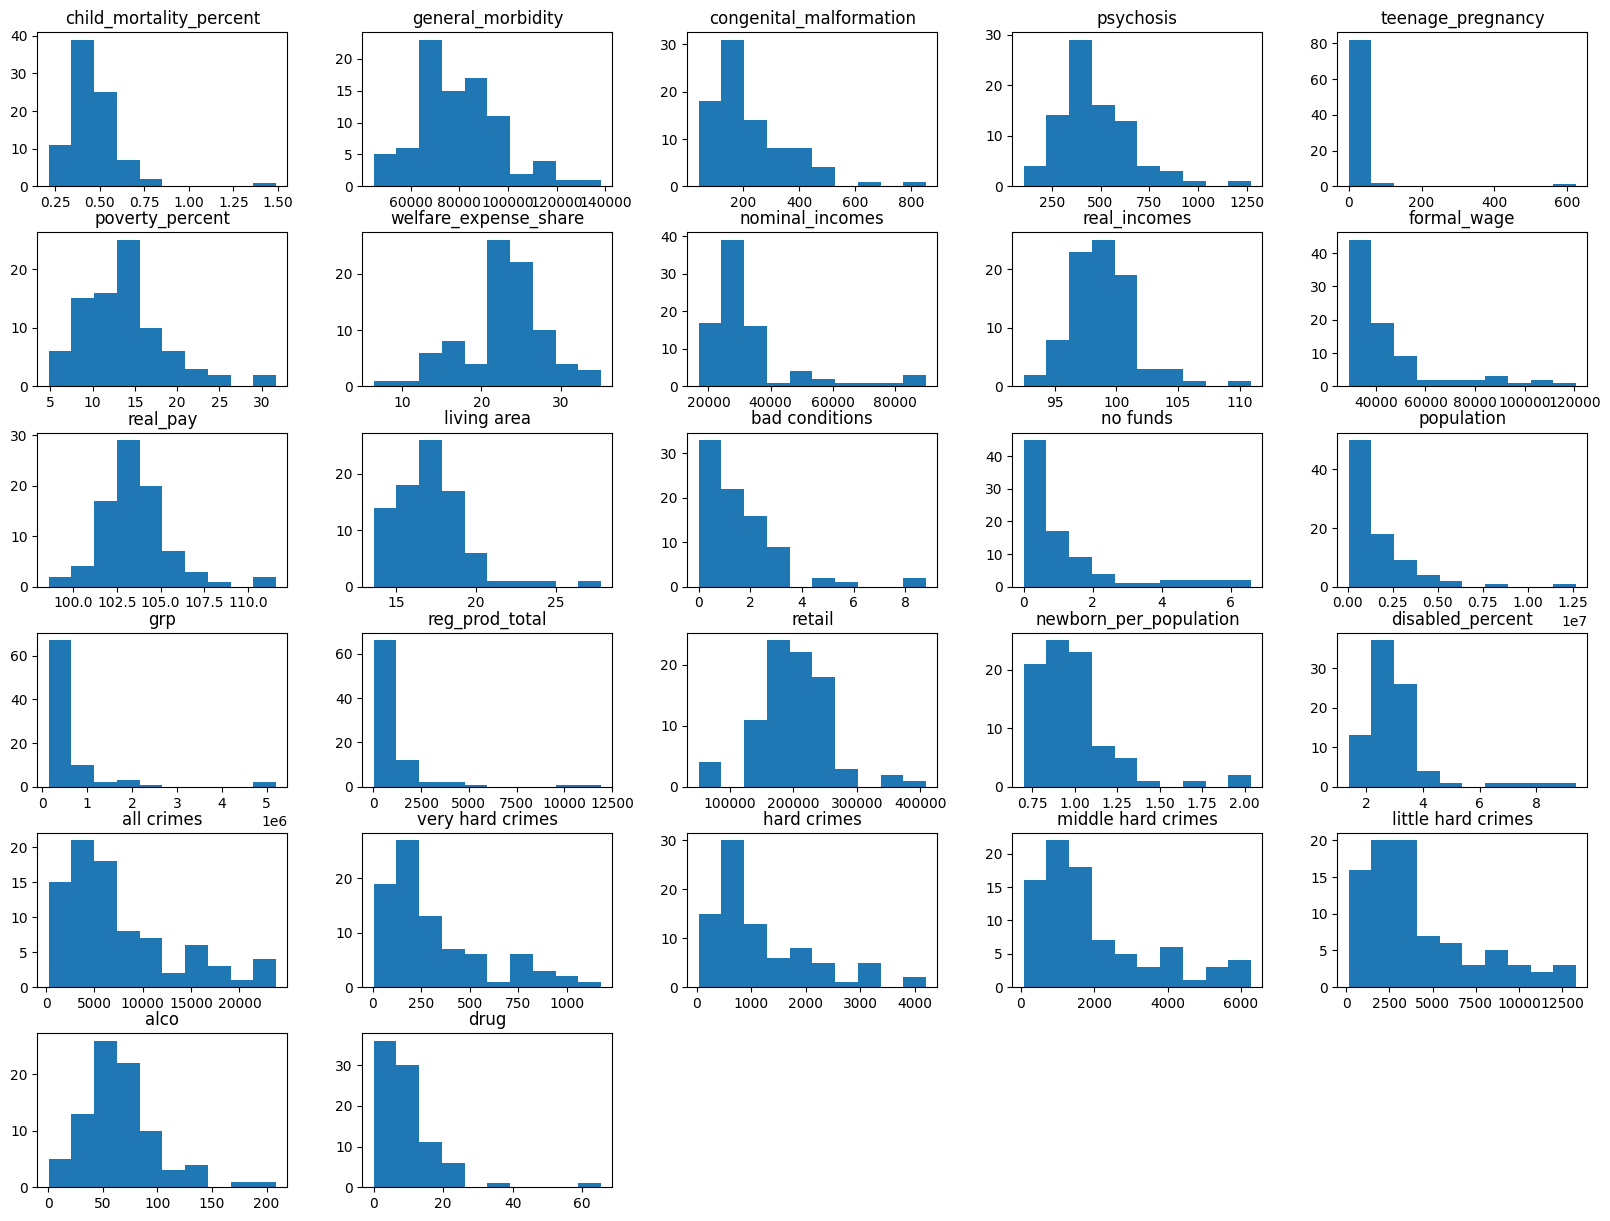

In [5]:
df.hist(figsize=(20, 15), grid = False);
plt.show()

В распределениях многих признаков видно выбросы.  
Отметим, что в нашем проекте мы не можем исключать какие-либо выбросы, т.к. с высокой степенью уверенности имеющиеся численные оценки носят достаточно объективный характер, отбрасывать некоторые регионы бессмысленно с точки зрения достижения целей проекта, а приведение экстремальных значений к медиане способно значительно исказить объективную картину.

Видно, что некоторые признаки имеют распределение, близкое к логарифмическому. Переведем эти признаки в логарифмическую шкалу

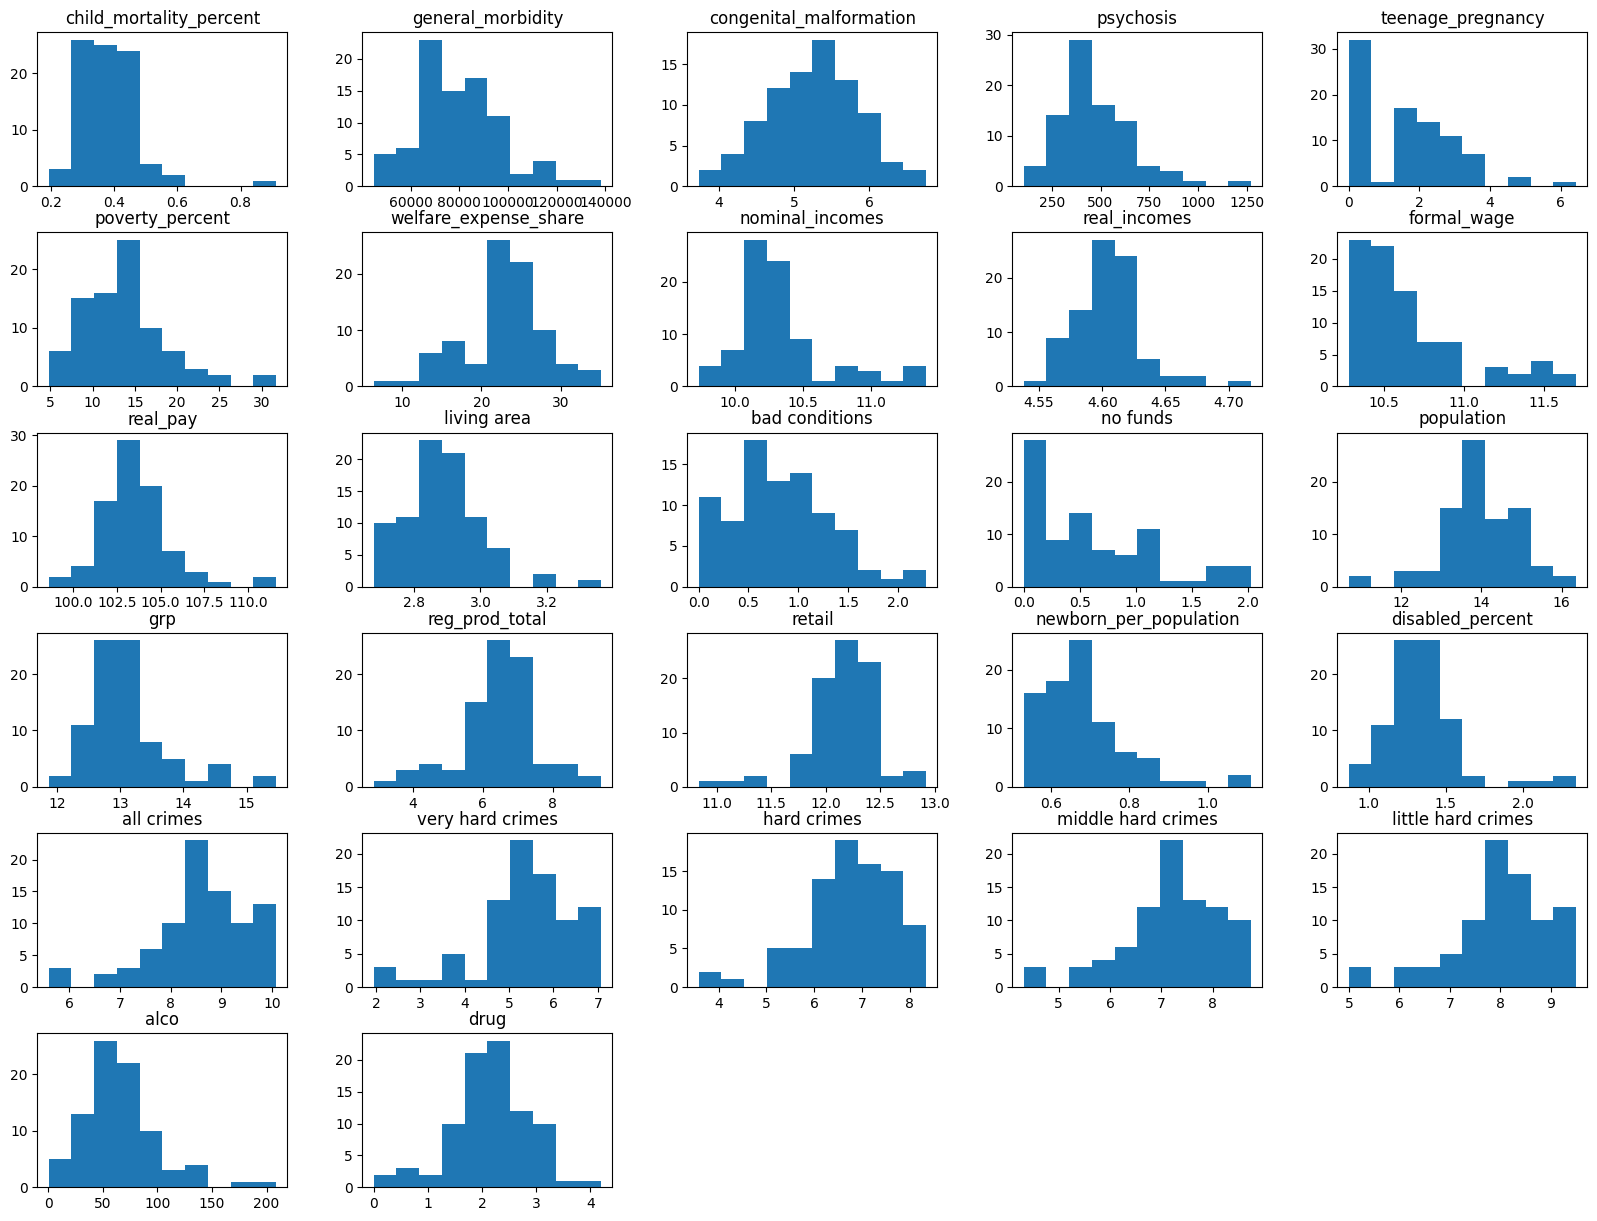

In [6]:
def log_func(data, columns):
    """Функция логарифмирует признаки

    Args:
        data(DataFrame): датасет для преобразования
        columns (list): список столбцов для преобразование

    Returns:
        data(DataFrame): преобразованный датасет
    """
    for i in columns:
        data[i] = np.log(data[i] + 1)
    return data

columns = ['child_mortality_percent', 'congenital_malformation', 'teenage_pregnancy', 'nominal_incomes', 'real_incomes', 'formal_wage', 'living area', 'bad conditions',
           'no funds', 'population', 'grp', 'retail','reg_prod_total', 'newborn_per_population', 'disabled_percent', 'all crimes', 'very hard crimes', 'hard crimes',
           'middle hard crimes', 'little hard crimes', 'drug']

df = log_func(df, columns)

df.hist(figsize=(20, 15), grid = False);
plt.show()

### 3.3 Анализ мультиколлинеарности

Корреляционная матрица. Поскольку распределения далеки от нормальных, рассмотрим ранговые критерии Спирмена (предполагает линейную зависимость между признаками) и Кендалла.

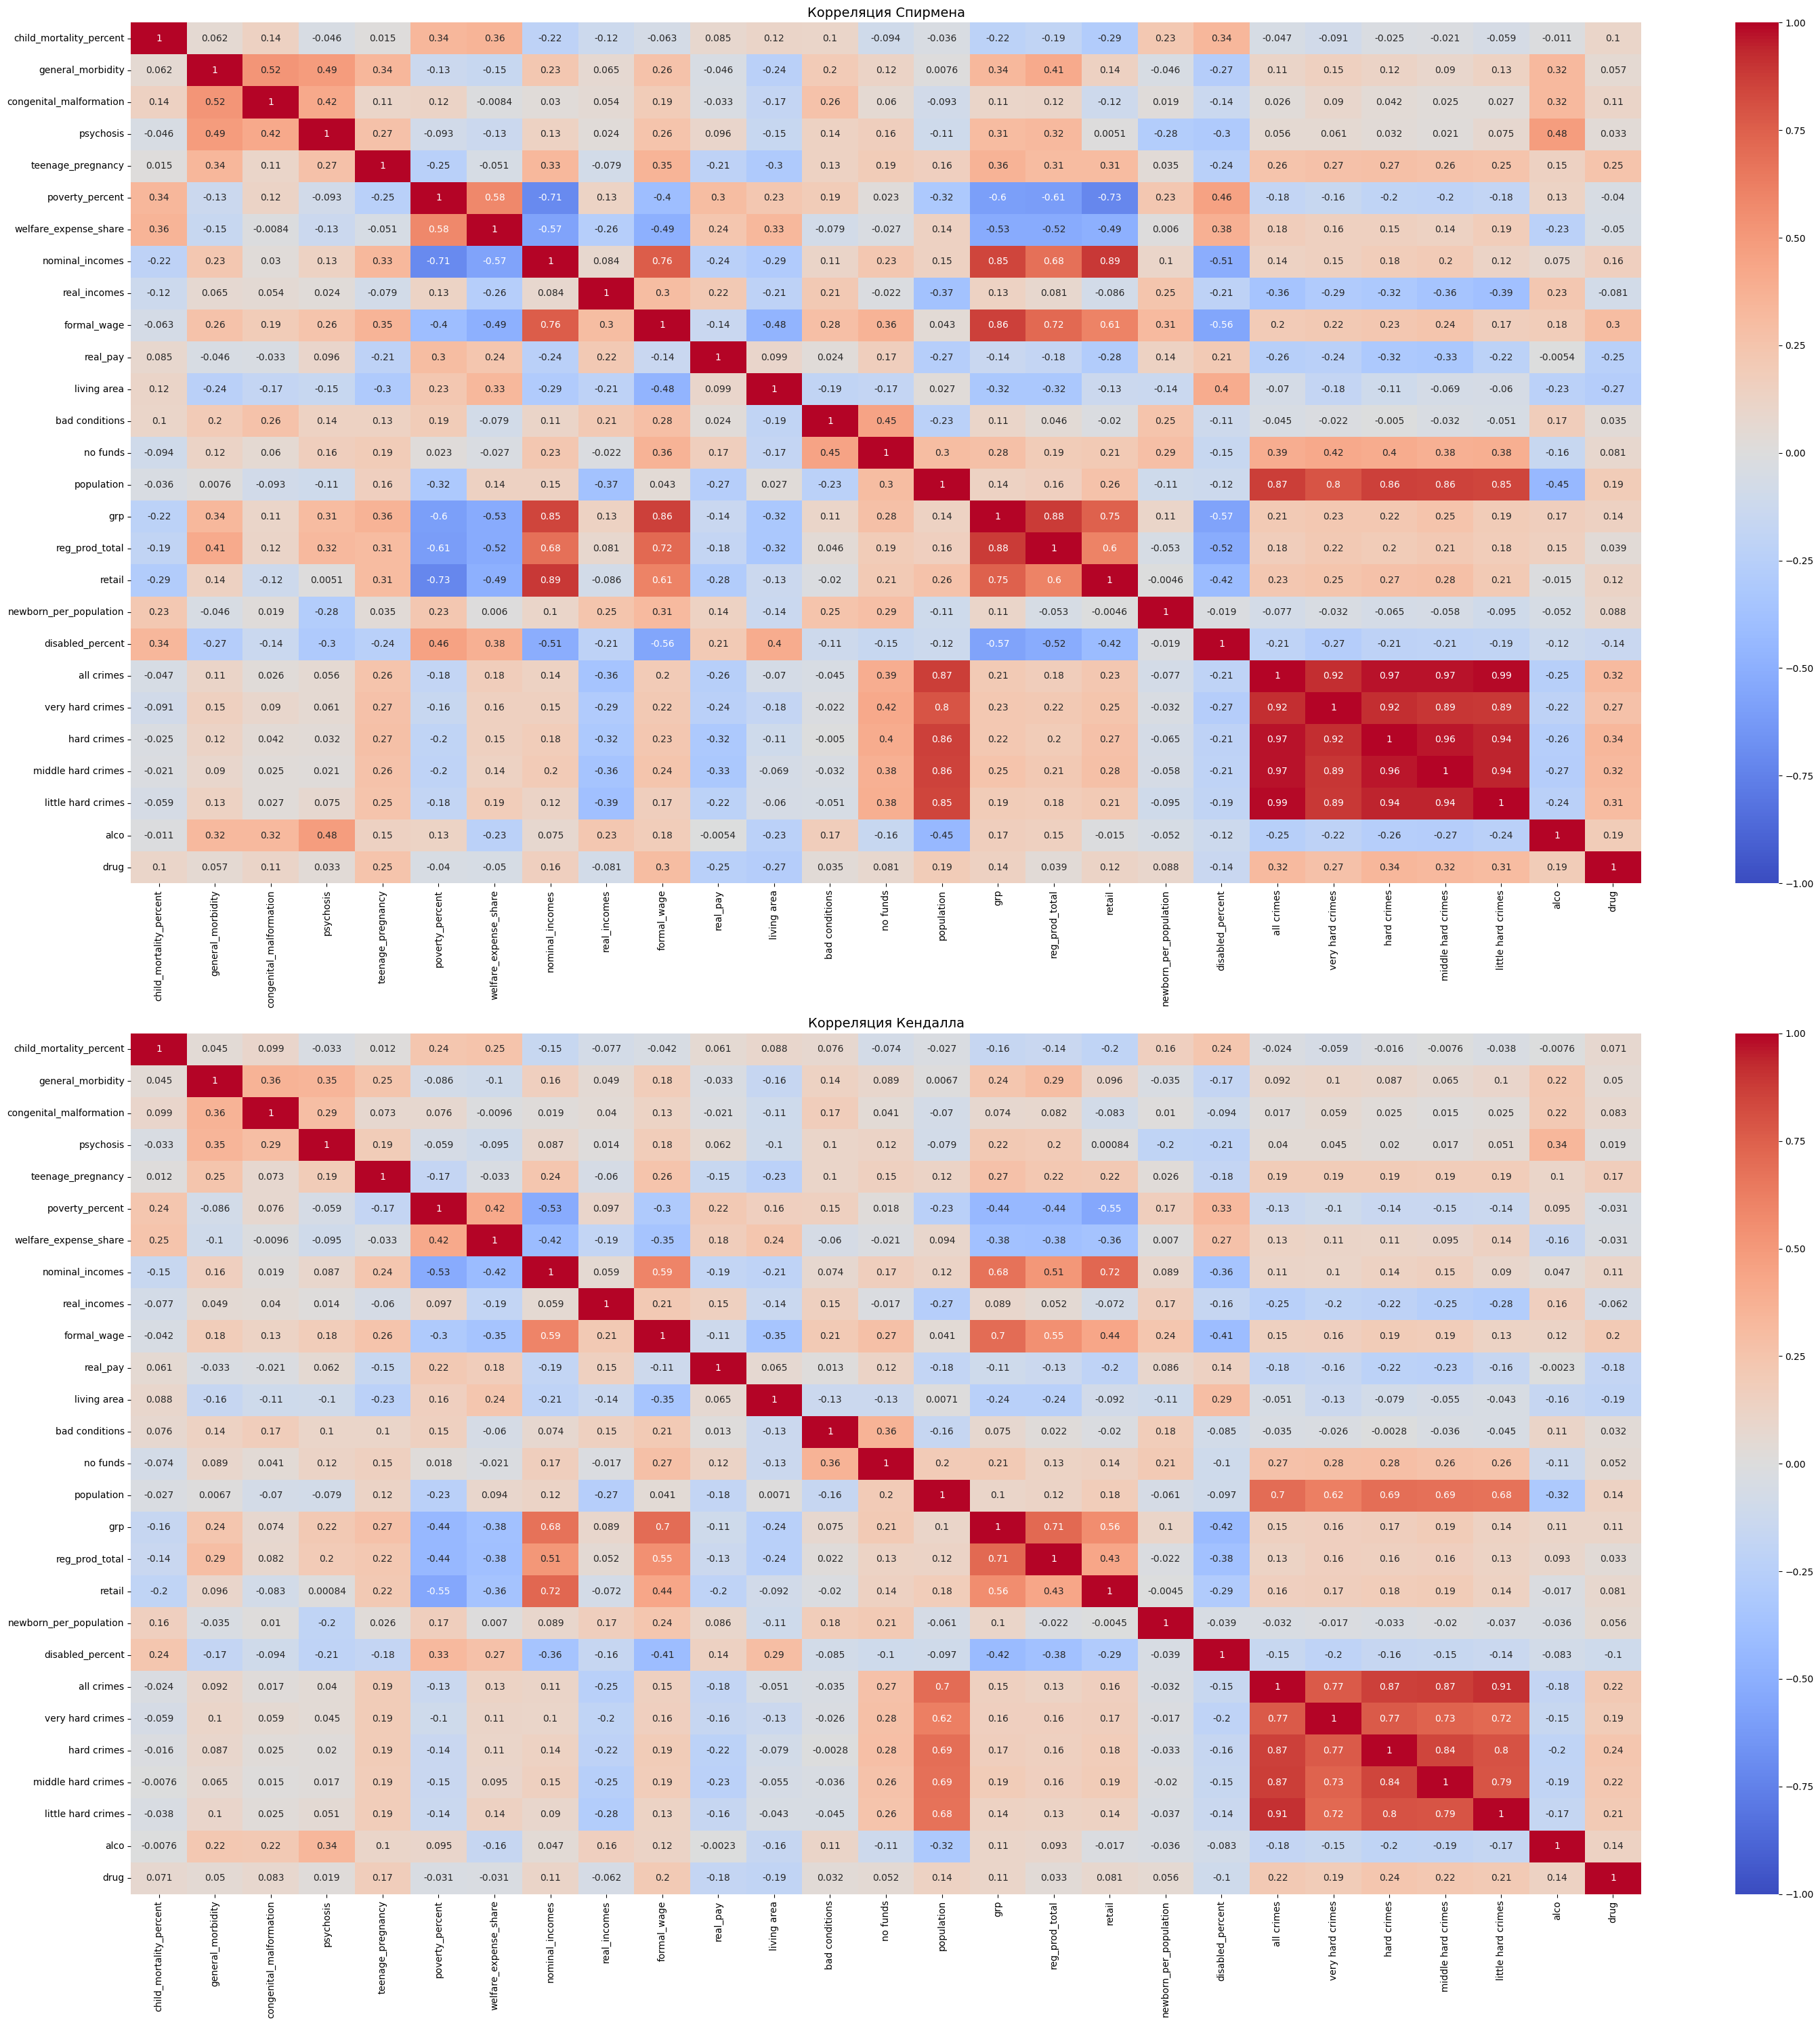

In [7]:
fig, ax = plt.subplots(2, 1, figsize=(30, 30))
sns.heatmap(df.corr(method='spearman'), 
            annot=True, cmap='coolwarm', vmin=-1, ax=ax[0])
sns.heatmap(df.corr(method='kendall'), 
            annot=True, cmap='coolwarm', vmin=-1, ax=ax[1])
ax[0].set_title('Корреляция Спирмена', fontsize=14)
ax[1].set_title('Корреляция Кендалла', fontsize=14)
plt.tight_layout();

Ожидаемо видна сильная линейная связь между сведениями о преступлениях. Оставим только признак all_crimes (общее число преступлений).

Признак formal_wage (Среднемесячная номинальная начисленная заработная плата) показывает высокий уровень корреляции с признаками grp и reg_prod_total. Уберем признак.

Признаки retail (розничная торговля) и nominal incomes (средний денежный доход) показывают высокий уровень корреляции. Оставим признак retail, так как есть признак real_incomes.

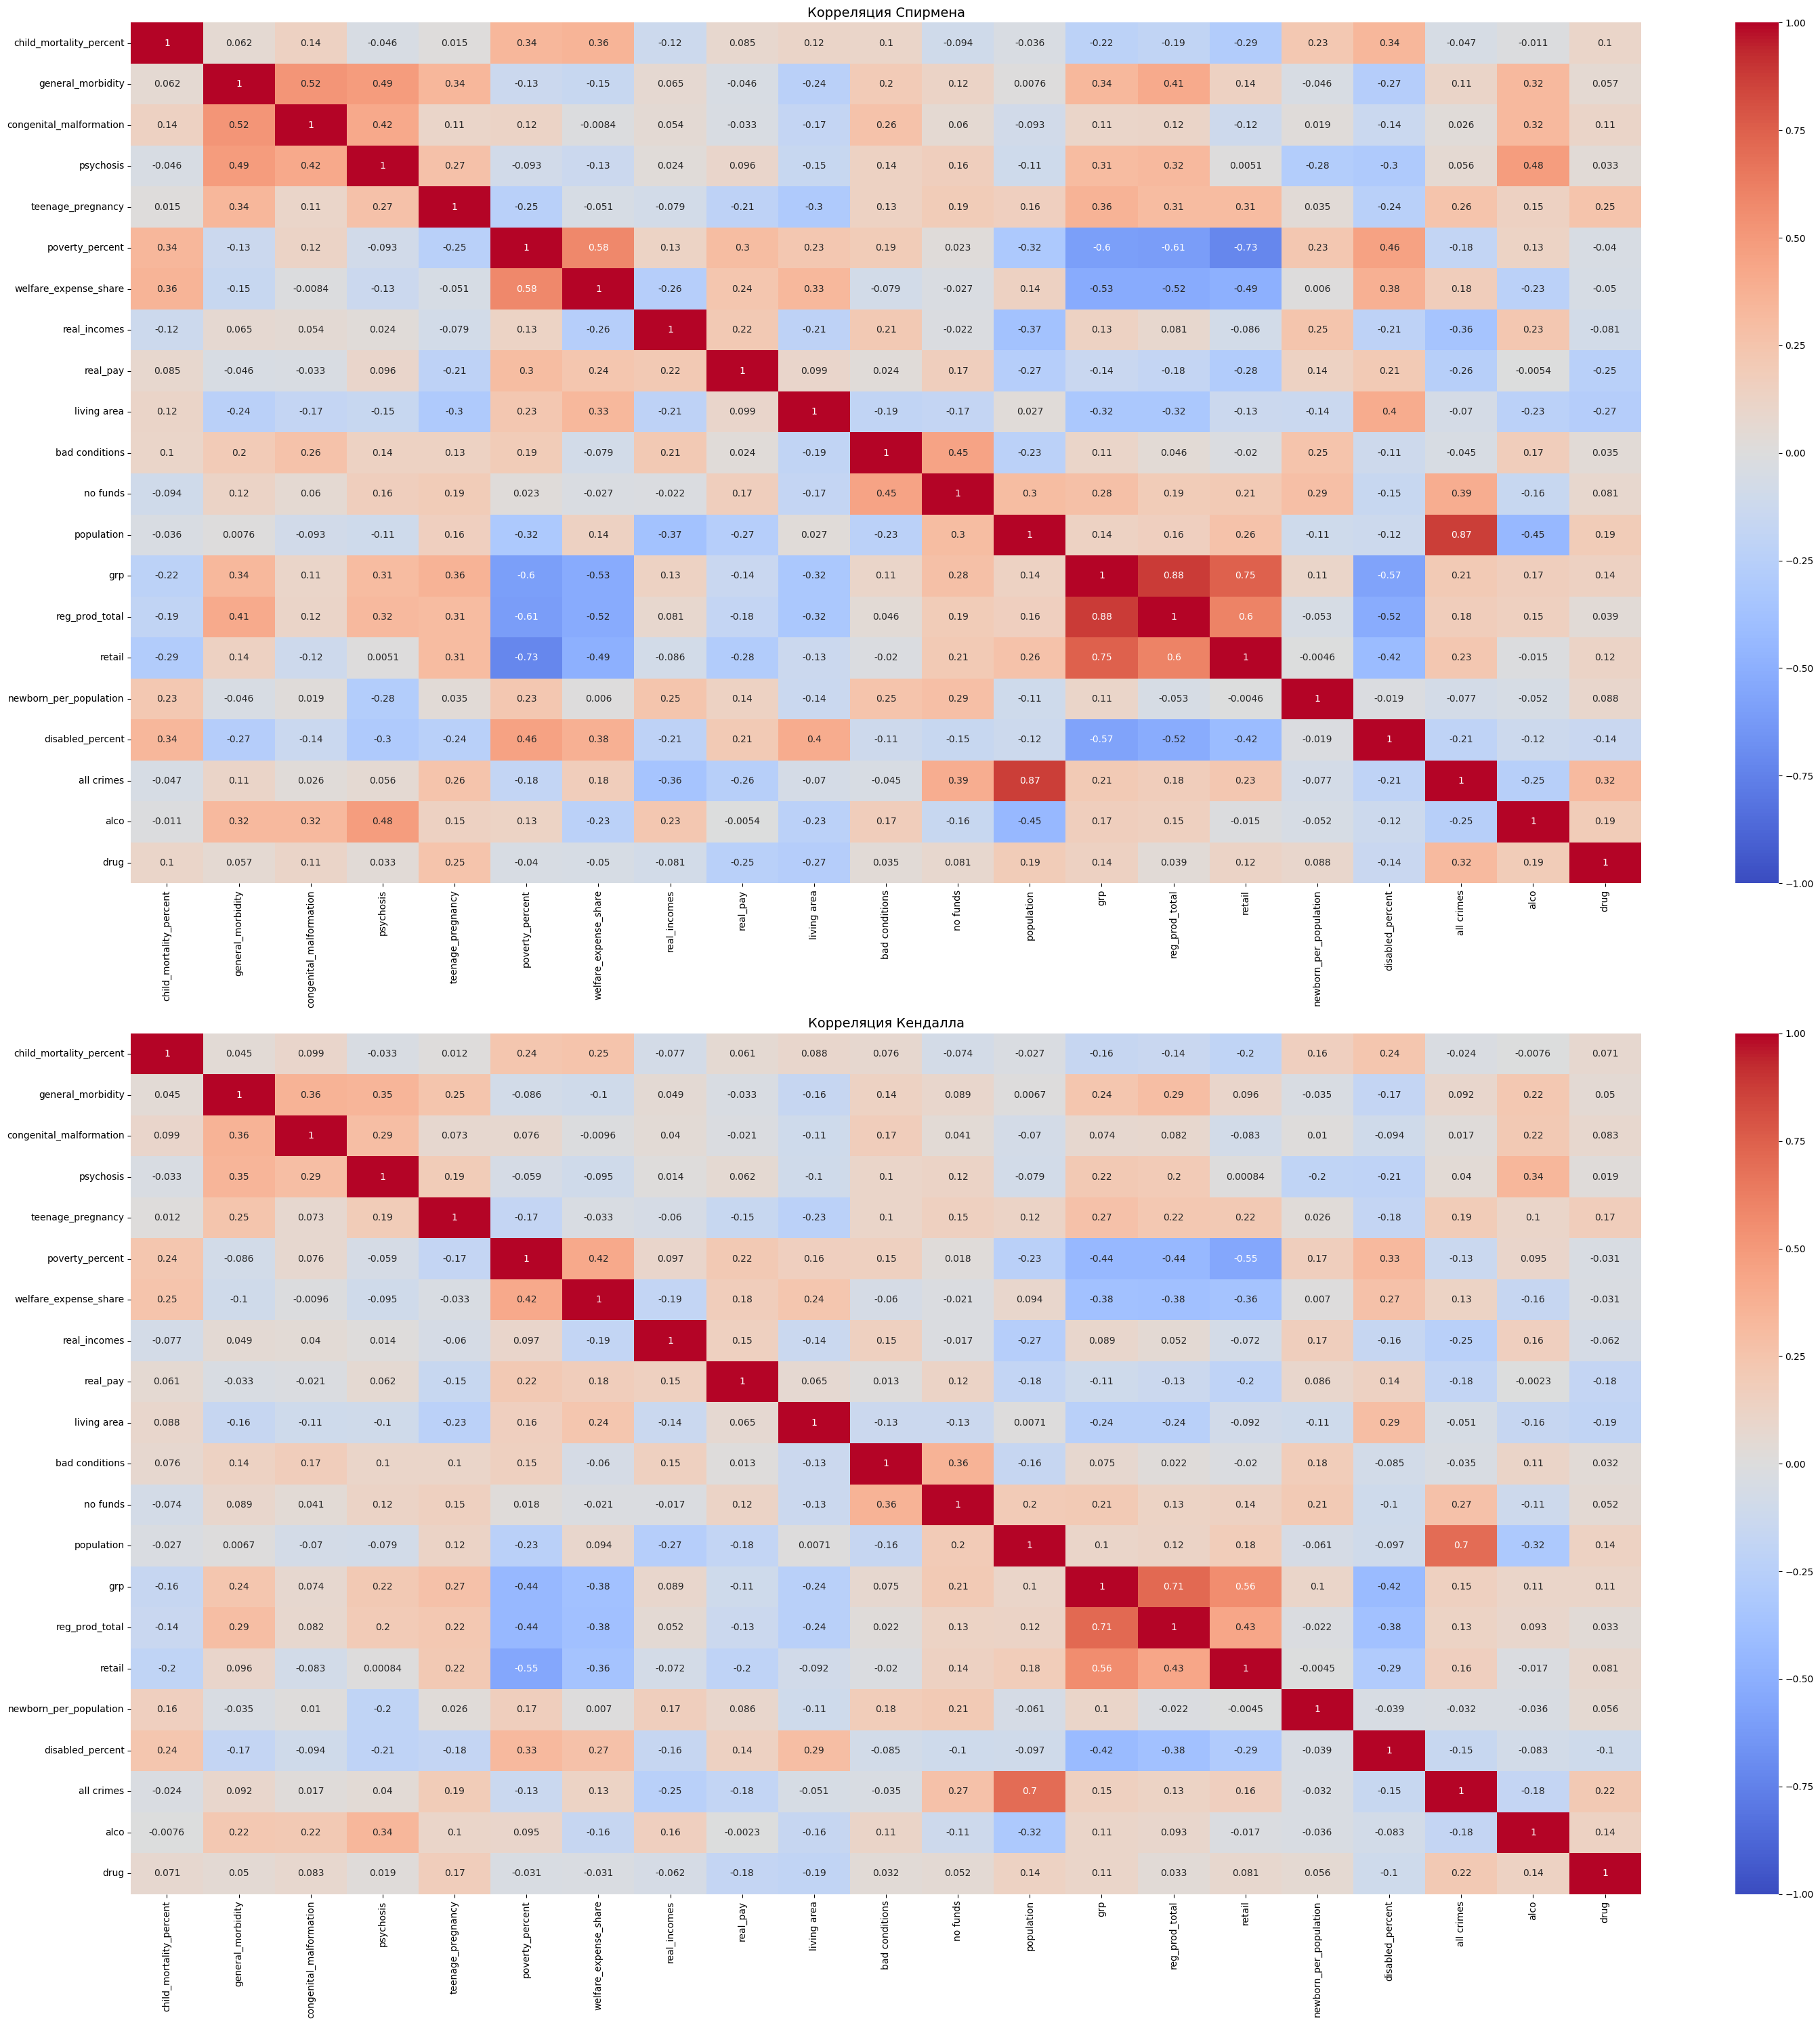

In [8]:
df.drop(
    columns=['very hard crimes', 'hard crimes', 'middle hard crimes', 'little hard crimes', 'formal_wage', 'nominal_incomes'], 
    axis=1, inplace=True)

fig, ax = plt.subplots(2, 1, figsize=(30, 30))
sns.heatmap(df.corr(method='spearman'), 
            annot=True, cmap='coolwarm', vmin=-1, ax=ax[0])
sns.heatmap(df.corr(method='kendall'), 
            annot=True, cmap='coolwarm', vmin=-1, ax=ax[1])
ax[0].set_title('Корреляция Спирмена', fontsize=14)
ax[1].set_title('Корреляция Кендалла', fontsize=14)
plt.tight_layout();

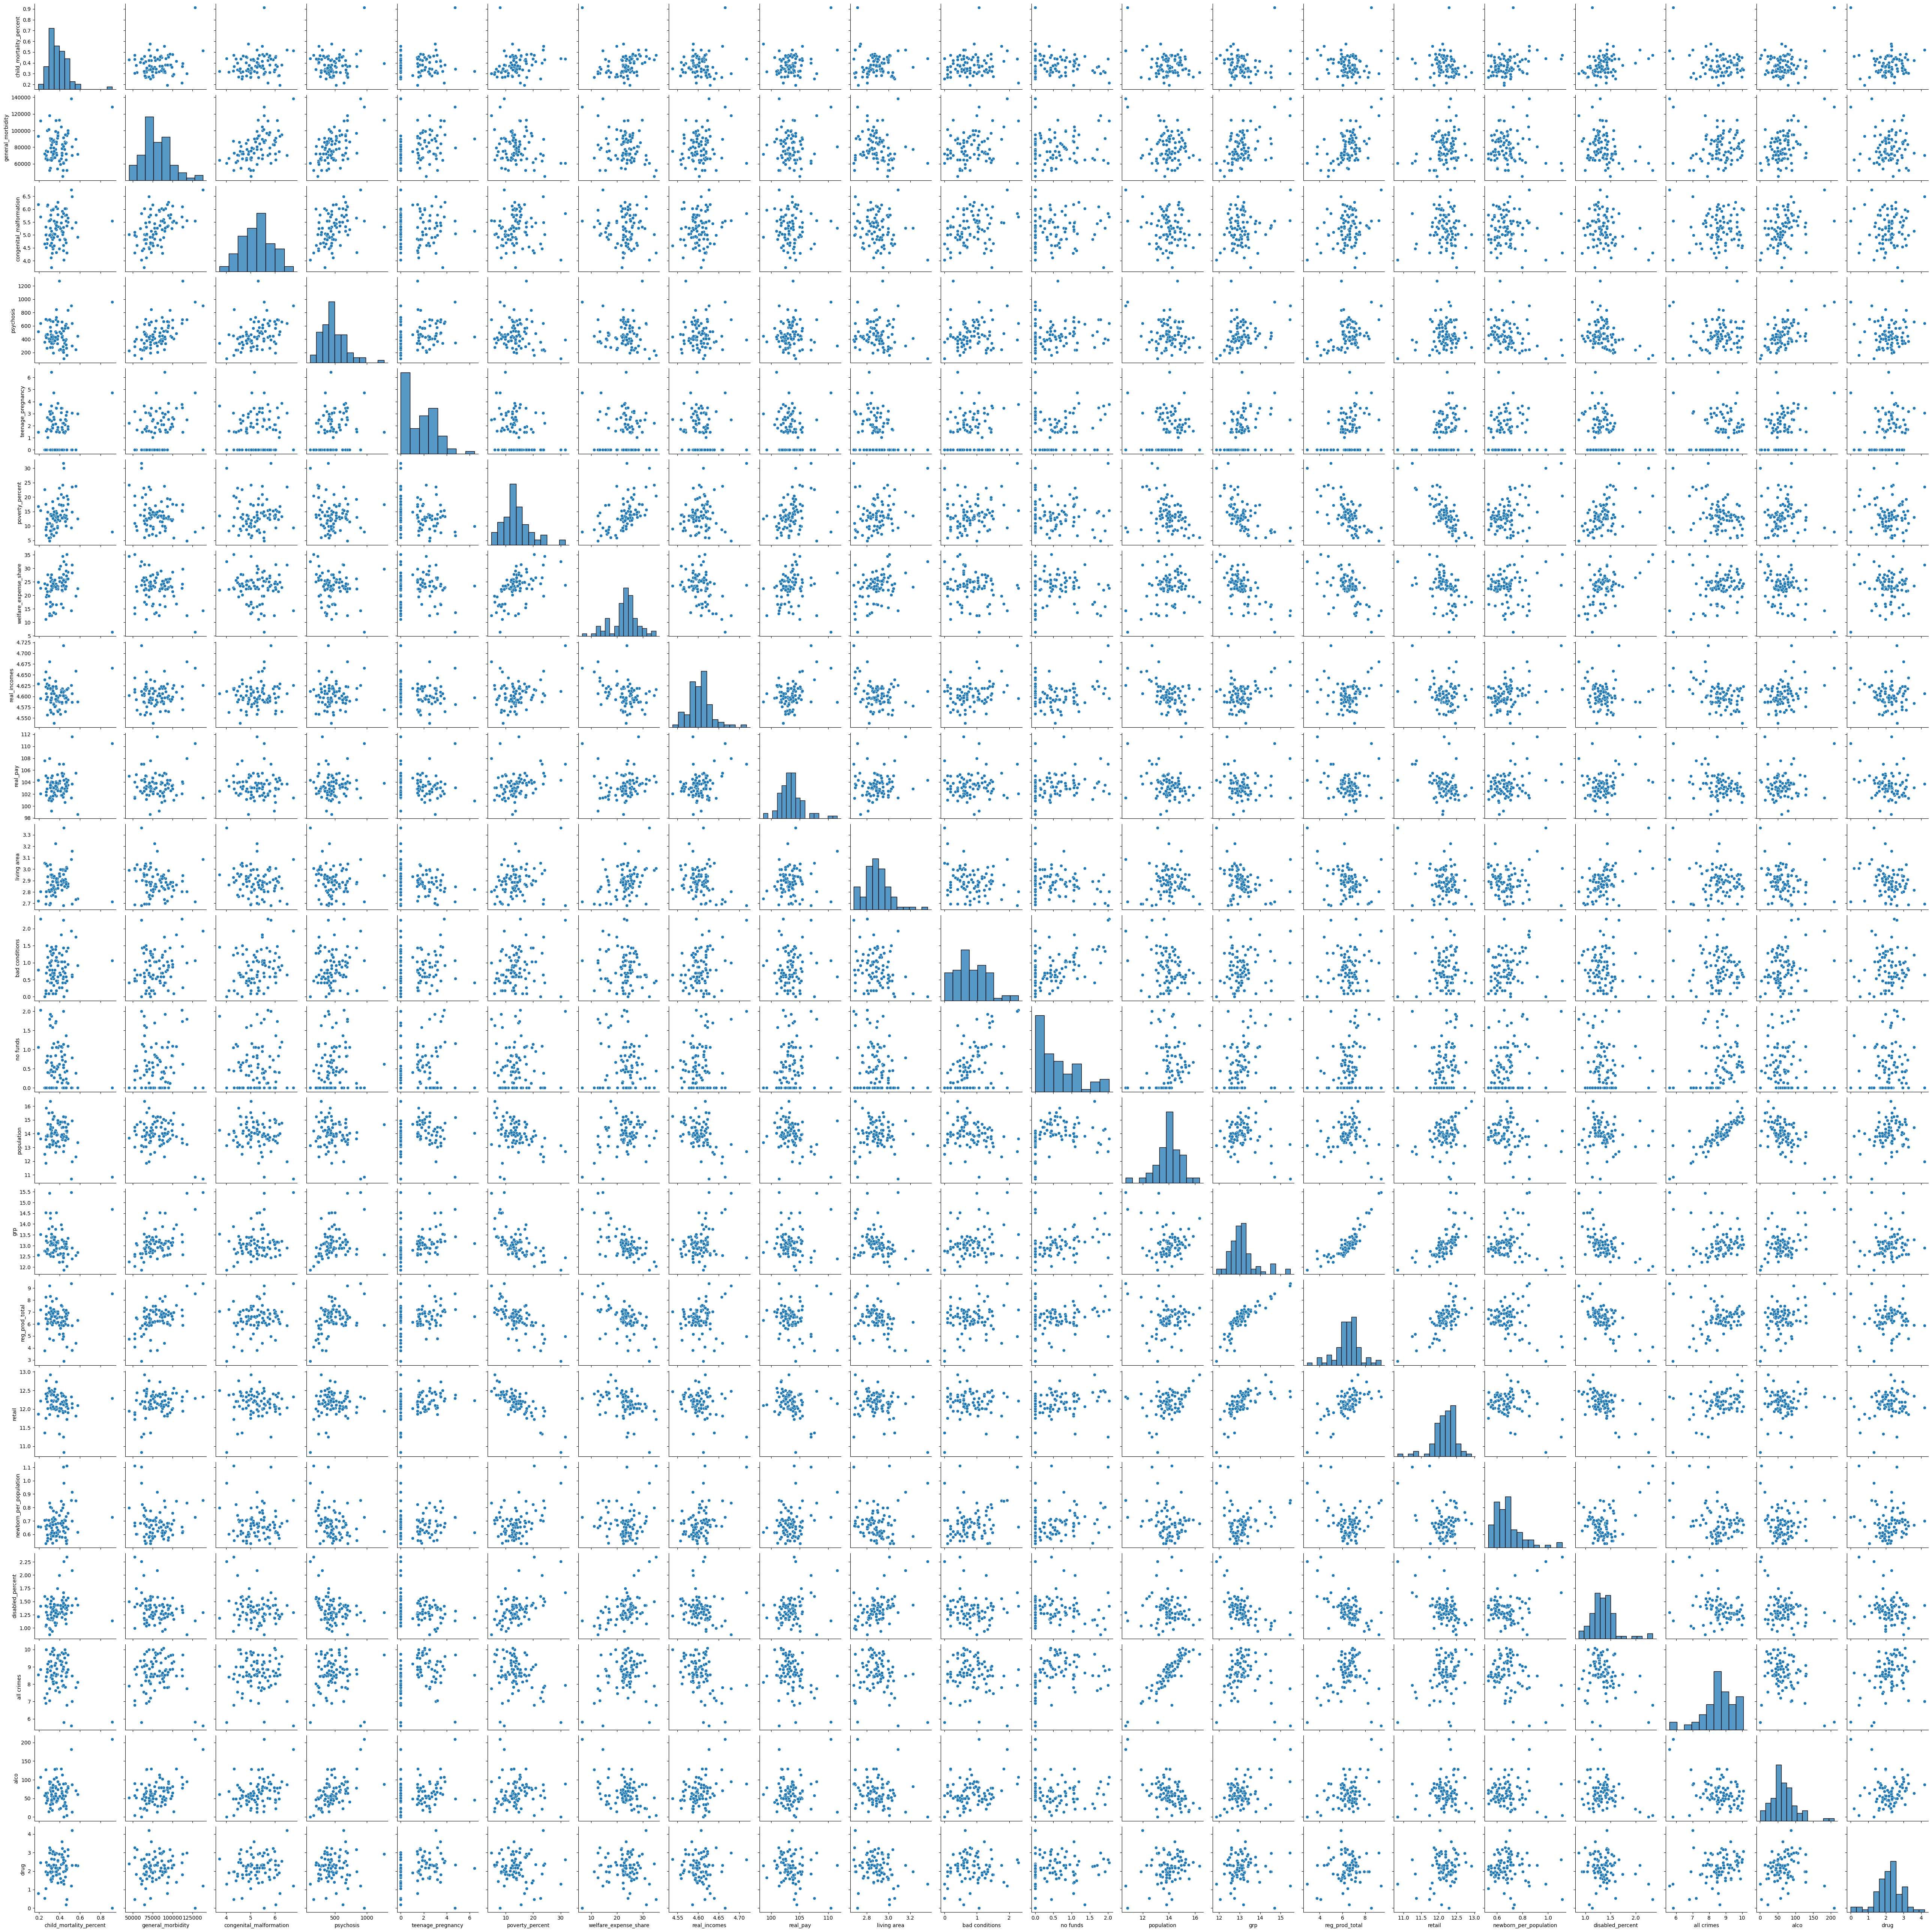

In [9]:
sns.pairplot(df)

Из графиков заметна сильная линейная связь у признаков population и all_crimes. Поскольку оба признака являются значимыми, мы не будем удалять их. в дальнейшем, возможные проблемы, связанные с наличием высокой корреляции, при кластеризации можно будет исключить путем использования PCA

По графикам распределений несколько признаков могут иметь нормальное распределение.  
Используем тест Шапиро-Уилка, чтобы выяснить, можно ли считать распределения признаков нормальными

In [10]:
# задаём уровень значимости
alpha = 0.05 

for col in df.columns:
    _, p = stats.shapiro(df[col])
    if p <= alpha:
        print(f'{col}: Распределение не нормальное')
    else:
        print(f'{col}: Распределение нормальное')

child_mortality_percent: Распределение не нормальное
general_morbidity: Распределение не нормальное
congenital_malformation: Распределение нормальное
psychosis: Распределение не нормальное
teenage_pregnancy: Распределение не нормальное
poverty_percent: Распределение не нормальное
welfare_expense_share: Распределение не нормальное
real_incomes: Распределение не нормальное
real_pay: Распределение не нормальное
living area: Распределение не нормальное
bad conditions: Распределение не нормальное
no funds: Распределение не нормальное
population: Распределение не нормальное
grp: Распределение не нормальное
reg_prod_total: Распределение не нормальное
retail: Распределение не нормальное
newborn_per_population: Распределение не нормальное
disabled_percent: Распределение не нормальное
all crimes: Распределение не нормальное
alco: Распределение не нормальное
drug: Распределение нормальное


Тест Шапиро-Уилка  показывает, что только признаки 'congenital_malformation' (врожденные пороки развития) и  'drug' (сведения о заболеваемости наркоманией) можно считать нормально распределенными.

### 3.4 Cохранение данных

In [11]:
df.to_csv('social_russia_data/df_eda.csv')

Вывод

Был обработан исходный датасет: удалены некоторые признаки с сильной линейной связью, некоторые признаки были преобразованы. Итоговая таблица сохранена в файл `social_russia_data/df_eda.csv`